In [9]:
# 필요 라이브러리 불러오기
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# 단일 계층 신경망 정의
class SingleLayerNN(nn.Module):
    # nn.Module의 메서드 상속
    # 상속 될 때 초기화 되지 않아서 super 함수를 이용하여 초기화 하는 과정이 필요함
    def __init__(self, input_size, output_size):
        '''super() 함수는 현재의 부모클래스인 nn.Module에 접근하여,
        __init__() 메서드를 호출하여 nn.Module의 기본 변수들을 초기화.
        '''
        super(SingleLayerNN, self).__init__()
        # 인스턴스의 새로운 변수 생성 : 선형 함수
        self.linear = nn.Linear(input_size, output_size)
    # 순전파를 정의. 입력 x를 선형 층에 통과시켜 출력을 계산.
    def forward(self, x):
        out = self.linear(x)
        return out

In [3]:
# 하이퍼파라미터 설정
input_size = 10  # 입력층 노드 수
output_size = 1  # 출력층 노드 수
learning_rate = 0.01
epochs = 1000

In [4]:
# 모델, 손실 함수, 최적화 알고리즘 초기화
model = SingleLayerNN(input_size, output_size)
criterion = nn.MSELoss()  # 평균 제곱 오차 손실 함수
optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # 확률적 경사 하강법


In [5]:
# 임의의 데이터셋 생성
x_train = torch.randn(100, input_size)  # 100개의 샘플, 각 샘플은 input_size 차원
y_train = torch.randn(100, output_size)  # 각 샘플에 대한 타겟 값


In [6]:
losses = []  # 손실 기록을 위한 리스트

# 학습 과정
for epoch in range(epochs):
    # 순전파: 모델에 x_train을 전달하여 예측값 계산
    predictions = model(x_train)

    # 손실 계산
    loss = criterion(predictions, y_train)

    losses.append(loss.item())

    # 역전파: 모델의 매개변수에 대한 손실의 기울기를 계산
    optimizer.zero_grad()  
    loss.backward()

    # 매개변수 업데이트
    optimizer.step()


    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [100/1000], Loss: 1.2375328540802002
Epoch [200/1000], Loss: 1.222174882888794
Epoch [300/1000], Loss: 1.221213936805725
Epoch [400/1000], Loss: 1.2211095094680786
Epoch [500/1000], Loss: 1.2210959196090698
Epoch [600/1000], Loss: 1.221094012260437
Epoch [700/1000], Loss: 1.2210936546325684
Epoch [800/1000], Loss: 1.2210935354232788
Epoch [900/1000], Loss: 1.2210935354232788
Epoch [1000/1000], Loss: 1.2210936546325684


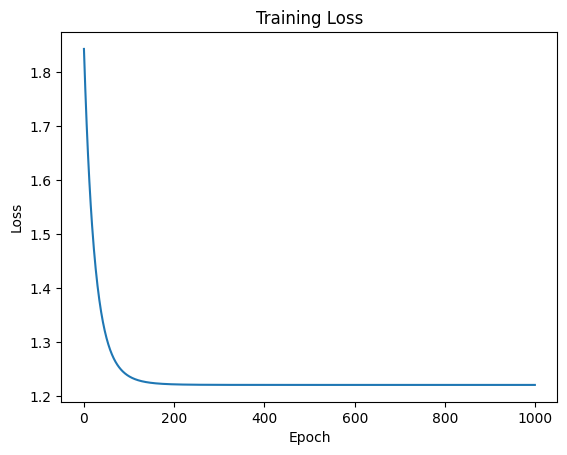

In [7]:
# 훈련 과정 시각화
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



In [8]:
# 모델 평가
model.eval() # 모델을 평가 모드로 설정
with torch.no_grad():  # 기울기 계산을 수행하지 않음
    predictions = model(x_train)
    # 평가를 위한 손실 계산
    test_loss = criterion(predictions, y_train)
    print(f'Test Loss: {test_loss.item():.4f}')


Test Loss: 1.2211
